In [7]:
! pip3 install qutip
! pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.1 MB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [42]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../source')


import functions_utils as utils
rc('text', usetex=False)
plt.rcParams.update({
"text.usetex": False,
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})

In [43]:
def compute_phonon_spectrum(wavefunction, energy, material, device, which = "z"):
    if which == "z":
        utils.S_ph_z(wavefunction, energy, material, device)
    else:
        utils.S_ph_x(wavefunction, energy, material, device)


In [44]:
## Definition of the material is the dictionary
material = SiGe  #example
device = Petta
print("Device:", device)
print("Material:", material)

Device: {'lxy': 38, 'lz': 2.5, 'dx': 150, 'name': 'Petta'}
Material: {'rho': 22.135, 'Xiu': 5000000.0, 'Xid': 8770000.0, 'c': {'L': 9150.0, 'T': 5000.0}, 'p': 0, 'name': 'SiGe', 'sign': 4.654261342929703e-05}


In [58]:
a = sns.set(context="paper", style="whitegrid", font_scale=1.4,  palette='deep')

wavefunction = utils.fgauss  #gaussian wavefunction
material_device = zip([SiGe, GaAs], [Struck, Malinowski])  #two relevant devices GaAs-Malinowski and SiGe-Struck
energies = np.logspace(0,4,101) #Energies to compute the spectral density
alpha = 1e-2 #factor Stc/Seps
S1 = 0.5 #meV^2/Hz
T = 100 #mK
hbar = utils.hbar
R = 50 #resistance for Johnson noise

In [59]:
# Phonon spectrum
Sphx = []
Sphz = []
S1fz = []
SJz = []
for mn,mat in enumerate(material_device):
    Sphx.append([utils.S_ph_x(wavefunction,e0,mat[1],mat[0]) for e0 in energies])
    Sphz.append([utils.S_ph_z(wavefunction,e0,mat[1],mat[0]) for e0 in energies])

s1fz = [utils.S_overf(e0, S = S1,T = T) for e0 in energies]
Sjz = [utils.S_john1(e0,R = R,T = T) for e0 in energies]
Sphx = np.array(Sphx)
Sphz = np.array(Sphz)

/Users/krzywdaja/Documents/Old_docs_to_sort/Numeryki/DQD_COHERENCE/CLEAR/round2/Decoherence-in-spin-shuttling-code/code/notebooks/../source/functions_utils.py:104: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = integrate.quad(lambda th: sin(th) *D(mat)[pol](th)**2 *


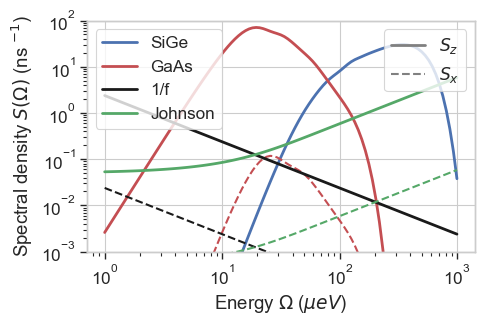

In [57]:
# plot
plt.figure(figsize = (5,3))

plt.plot(energies, Sphz[0]/hbar**2, "b", lw=2, label="SiGe")
plt.plot(energies, Sphz[1]/hbar**2, "r", lw=2, label="GaAs")
plt.plot(energies, Sphx[0]/hbar**2, "--b", lw=1.5)
plt.plot(energies, Sphx[1]/hbar**2, "--r", lw=1.5)


plt.plot(energies, S1fz/hbar**2, "k", lw=2, label="1/f")
plt.plot(energies, SJz/hbar**2, "g", lw=2, label="Johnson")
plt.plot(energies, alpha*S1fz/hbar**2, "--k", lw=1.5)
plt.plot(energies, alpha*SJz/hbar**2, "--g", lw=1.5)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-3,1e2)
plt.tick_params(which="both", left=True, bottom=True)
plt.xlabel(r"Energy $\Omega$ ($\mu eV$)")
plt.ylabel(r"Spectral density $S(\Omega)$ (ns $^{-1}$)")

ax = plt.twinx()
ax.set_yticks([])
ax.plot([],[],"-",color="gray",lw=2,label = r"$S_z$")
ax.plot([],[],"--",color="gray",lw=1.5,label = r"$S_x$")
ax.legend()

plt.savefig("AppB_spectral_density.png", dpi=200)

The relaxation rate takes both the spectral density and the matrix element:
$$
    \Gamma_{i,-} = \frac{1}{4} |\bra{+} \sigma_i \ket{-}|^2 S_i(\omega)
$$

{'rho': 22.135, 'Xiu': 5000000.0, 'Xid': 8770000.0, 'c': {'L': 9150.0, 'T': 5000.0}, 'p': 0, 'name': 'SiGe', 'sign': 4.654261342929703e-05}
{'rho': 50.35, 'Xiu': 0, 'Xid': 7000000.0, 'c': {'L': 5300.0, 'T': 2500.0}, 'p': 1400000.0, 'name': 'GaAs', 'sign': 0.01861704537171881}


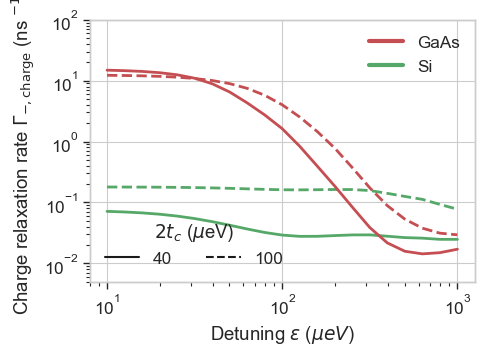

In [68]:
fig = plt.figure(figsize=(4.7,3.4))
plt.subplots_adjust(left=0.17, bottom=0.18, right=0.99, top=0.95)


colors = ["g","r"]
linestyle = ["-", "--"]
plt.plot([],[],"r",lw=3,label = "GaAs")
plt.plot([],[],"g",lw=3,label = "Si")
plt.legend(loc = "upper right", frameon=False)

om = lambda eps: np.sqrt(eps**2 + tun**2)
eps = np.logspace(1,3,21) # Detunings

for mn,mat in enumerate(material_device):

    for tn,tun in enumerate([40,100]):

        Sx = [utils.S_ph_x(wavefunction,om(eps0),mat[1],mat[0])+alpha*utils.S_overf(om(eps0), S = S1,T = T)+alpha*utils.S_john1(om(eps0),R = R,T = T) for eps0 in eps]
        Sz = [utils.S_ph_z(wavefunction,om(eps0),mat[1],mat[0])+utils.S_overf(om(eps0), S = S1,T = T)+utils.S_john1(om(eps0),R = R,T = T) for eps0 in eps]


        Sx = np.array(Sx)
        Sz = np.array(Sz)

        if mn==0:
            plt.plot(eps, tun**2/om(eps)**2*Sz/4/hbar**2 +eps**2/om(eps)**2*Sx/4/hbar**2 ,  lw=2, 
                 color = colors[mn], linestyle=linestyle[tn], label = r"Si, $t_c=%d$ $\mu$eV"%tun)
        if mn==1:
            plt.plot(eps, tun**2/om(eps)**2*Sz/4/hbar**2 +eps**2/om(eps)**2*Sx/4/hbar**2 ,  lw=2, 
                 color = colors[mn], linestyle=linestyle[tn], label = r"GaAs, $t_c=%d$ $\mu$eV"%tun)

#axes
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.5*1e-2,1e2)
plt.tick_params(which="both", left=True, bottom=True)
plt.xlabel(r"Detuning $\epsilon$ ($\mu eV$)")
plt.ylabel(r"Charge relaxation rate $\Gamma_{-,\mathrm{charge}}$ (ns $^{-1}$)")

#second legend
ax = plt.twinx()
ax.set_yticks([])
ax.plot([],[],"k-",lw=1.5,label = "40")
ax.plot([],[],"k--",lw=1.5,label = "100")
ax.legend(loc = "lower left", frameon=False, title="$2t_c$ ($\mu$eV)", ncol=2)

plt.savefig("AppB_charge_relaxation.png", dpi=200)

In [63]:
Sz

NameError: name 'Sz' is not defined